In [3]:
import warnings

warnings.simplefilter("ignore")

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report

In [9]:
digits = pd.read_csv("train.csv")

labels = digits["label"]
digits = np.array(digits.drop("label", axis=1)).astype("float")
digits.shape, labels.shape

((42000, 784), (42000,))

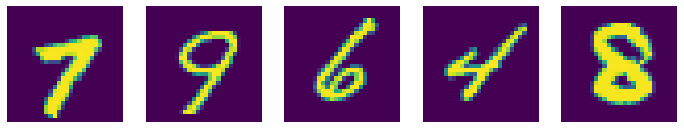

In [10]:
plt.figure(figsize=(12, 4))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(random.choice(digits).reshape(28, 28))
    plt.axis("off")

In [11]:
split = 0.7, 0.3  # train, test
# normalize data
digits /= 255.0

split_ind = int(len(digits) * split[0])
X_train, X_test, y_train, y_test = (
    digits[:split_ind],
    digits[split_ind:],
    labels[:split_ind],
    labels[split_ind:],
)
X_train.shape, X_test.shape

((29399, 784), (12601, 784))

In [12]:
model = MLPClassifier().fit(X_train, y_train)
y_pred = model.predict(X_test)

print(
    f"Using MLPClassifier with the default parameter values gives an accuracy of {accuracy_score(y_pred, y_test)}"
)

Using MLPClassifier with the default parameter values gives an accuracy of 0.9637330370605508


In [13]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1273
           1       0.99      0.97      0.98      1438
           2       0.96      0.97      0.96      1202
           3       0.95      0.97      0.96      1293
           4       0.98      0.95      0.96      1216
           5       0.97      0.92      0.95      1195
           6       0.94      0.99      0.97      1169
           7       0.97      0.97      0.97      1335
           8       0.96      0.95      0.95      1256
           9       0.93      0.96      0.94      1224

    accuracy                           0.96     12601
   macro avg       0.96      0.96      0.96     12601
weighted avg       0.96      0.96      0.96     12601



In [14]:
parameters = {
    "hidden_layer_sizes": [50, 100, 200],
    "alpha": [0.001, 0.01, 0.1],
    "max_iter": [200, 500, 800],
    "learning_rate_init": [0.0001, 0.001, 0.01, 0.1],
}

model = MLPClassifier()
clf = RandomizedSearchCV(estimator=model, param_distributions=parameters, cv=5)
clf.fit(
    X_train[:3000], y_train[:3000]
)  # reduce the train set size to shorten the training time

print("The best parameter values found are:\n")
print(clf.best_params_)

# store the best model found in "bestmodel"
bestmodel = clf.best_estimator_

The best parameter values found are:

{'max_iter': 500, 'learning_rate_init': 0.01, 'hidden_layer_sizes': 100, 'alpha': 0.001}


The accuracy score of the best model is 0.9331799063566384



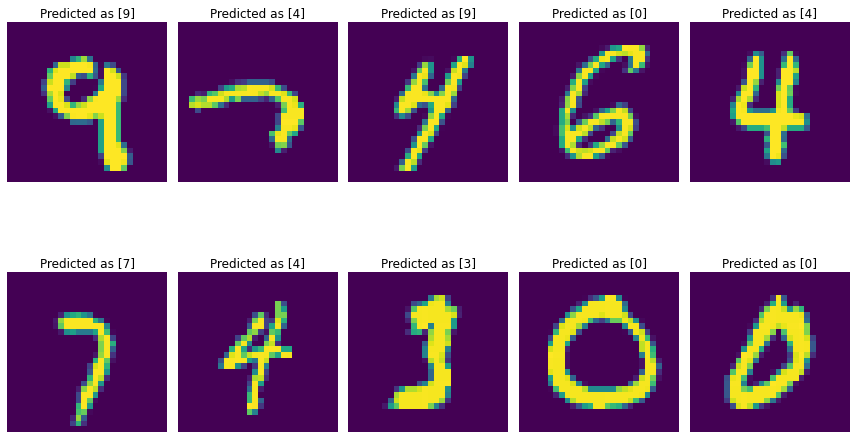

In [15]:
y_pred = bestmodel.predict(X_test)
print(f"The accuracy score of the best model is {accuracy_score(y_test, y_pred)}\n")

plt.figure(figsize=(12, 8))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    sample = random.choice(X_test)
    plt.imshow(sample.reshape(28, 28))
    pred = bestmodel.predict(sample.reshape(1, -1))
    plt.title(f"Predicted as {pred}")
    plt.axis("off")

plt.tight_layout()